In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,RobustScaler,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb

In [ ]:
str1="hello"
print(str(str1))

hello


In [ ]:
df=pd.read_csv("/content/drive/My Drive/HackerEarth/Price_Prediction/train.csv")

In [ ]:
test_df=pd.read_csv("/content/drive/My Drive/HackerEarth/Price_Prediction/test.csv")

In [ ]:

df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [ ]:
df['Market_Category'].value_counts()

23     323
452    322
358    270
55     246
3      239
      ... 
208      1
210      1
214      1
168      1
248      1
Name: Market_Category, Length: 248, dtype: int64

In [ ]:
df['instock_date']=pd.to_datetime(df['instock_date'])

In [ ]:
df['year']=df['instock_date'].dt.year
df['month']=df['instock_date'].dt.month
df['day']=df['instock_date'].dt.day


In [ ]:
df.drop(['instock_date'],axis=1,inplace=True)

In [ ]:
df["Customer_name"].replace({np.nan:"No_Name"}, inplace=True)

In [ ]:
df['Stall_no'].replace({np.nan:0.0},inplace=True)

In [ ]:
df['Discount_avail'].fillna(method='ffill',axis=0,inplace=True)

In [ ]:
df.shape

(6368, 17)

In [ ]:
df=df[df['Selling_Price']>=0]

In [ ]:
df['Minimum_price']=df['Minimum_price'].fillna(df['Selling_Price']-df['Minimum_price'].mean())

In [ ]:
df['Maximum_price']=df['Maximum_price'].fillna(df['Selling_Price']+df['Maximum_price'].mean())

In [ ]:
df['charges_1']=df['charges_1'].fillna(method='ffill',axis=0)

In [ ]:
df['charges_2 (%)']=df['charges_2 (%)'].fillna(method='ffill',axis=0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

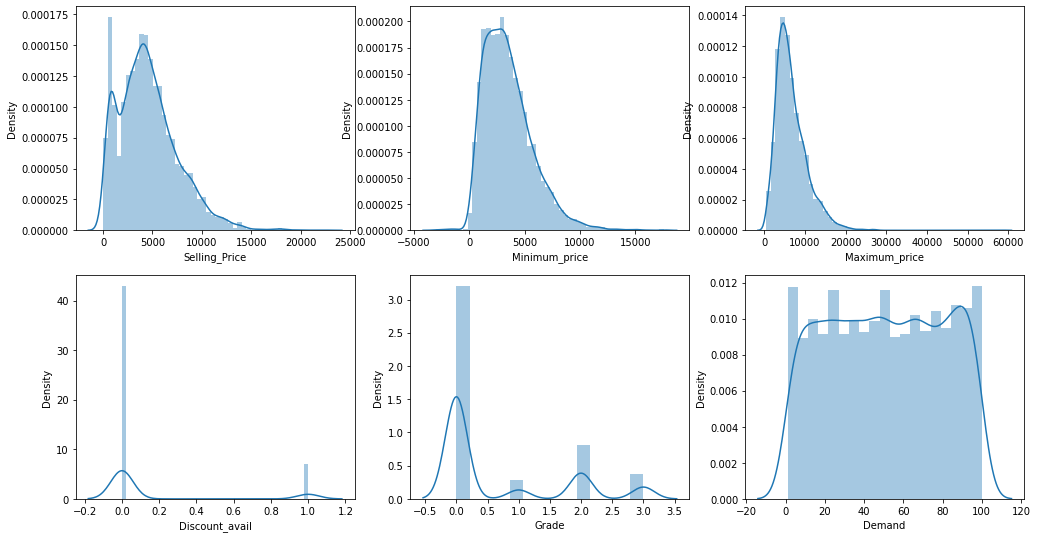

In [ ]:
plt.figure(figsize=(17,14))
plt.subplot(3,3,1)
sns.distplot(df.Selling_Price)
plt.subplot(3,3,2)
sns.distplot(df.Minimum_price)
plt.subplot(3,3,3)
sns.distplot(df.Maximum_price)
plt.subplot(3,3,4)
sns.distplot(df.Discount_avail)
plt.subplot(3,3,5)
sns.distplot(df.Grade)
plt.subplot(3,3,6)
sns.distplot(df.Demand)

In [ ]:
df['Grade'].value_counts()

0    4339
2    1093
3     502
1     379
Name: Grade, dtype: int64

In [ ]:
df['Grade_product']=df['Grade']*df['Demand']


In [ ]:
df['diff']=(df['Maximum_price']-df['Minimum_price'])/2

In [ ]:
label_object = {}
objList = df.select_dtypes(include = "object").columns
for col in objList:
    le=LabelEncoder()
    le=le.fit(pd.concat([df[col].astype(str), test_df[col].astype(str)], axis=0))
    df[col] = le.transform(df[col].astype(str))
    label_object[col]=le


In [ ]:
df.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,day,Grade_product,diff,loyaltyxdiscount
0,805,37.0,2,5658,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,22,68,865.0,1.0
1,9124,38.0,24,5226,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,27,0,1428.5,1.0
2,1218,9.0,447,7299,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,18,0,778.5,1.0
3,9404,50.0,23,106,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,28,96,7862.0,1.0
4,3552,7.0,63,2650,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,29,35,3415.5,2.0


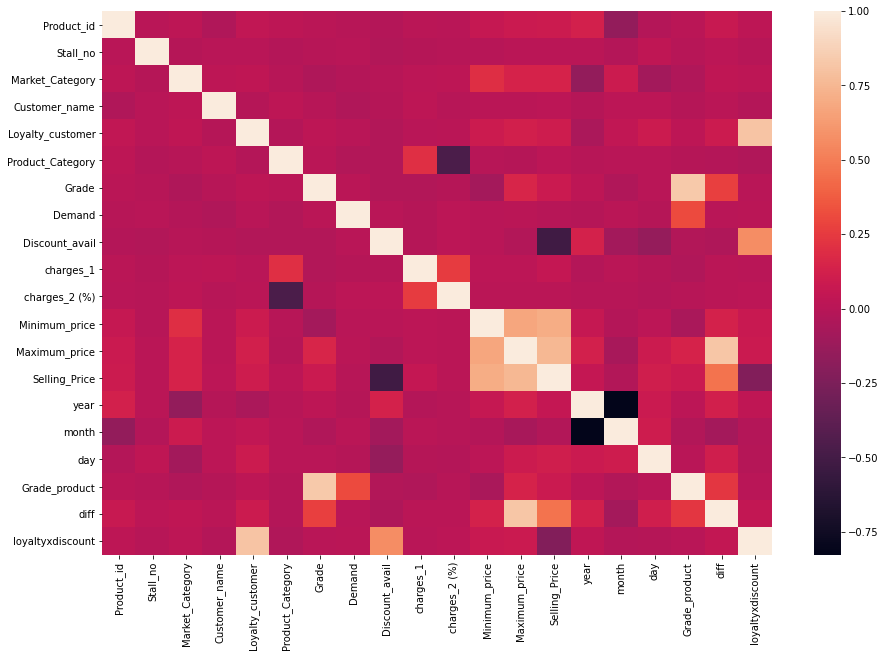

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())


**Splitting into** **X** **and** **y**

In [ ]:
X=df[[col for col in df.columns if col!='Selling_Price']]

In [ ]:
y=df[['Selling_Price']]

In [ ]:
X.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,day,Grade_product,diff,loyaltyxdiscount
0,805,37.0,2,5658,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,2015,8,22,68,865.0,1.0
1,9124,38.0,24,5226,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,2016,3,27,0,1428.5,1.0
2,1218,9.0,447,7299,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,2015,8,18,0,778.5,1.0
3,9404,50.0,23,106,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,2016,3,28,96,7862.0,1.0
4,3552,7.0,63,2650,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,2016,3,29,35,3415.5,2.0


In [ ]:
y.head()

,Selling_Price
0,4185.947700
1,9271.490256
2,6785.701362
3,13028.917824
4,906.553935


**Scaling and Normalization**

In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

**Model Building**

In [ ]:
y=y.to_numpy()

In [ ]:
y=np.log(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=0)

In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
reg =  ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train.reshape(-1,))

In [ ]:
predictions=reg.predict(X_test)

In [ ]:
predictions=np.exp(predictions)

In [ ]:
rmsle=np.sqrt(mean_squared_log_error( y_test, predictions ))

In [ ]:
rmsle


5.968355982094557

In [ ]:
score=max(0,100-rmsle)

In [ ]:
score

94.03164401790545

**Testing Data**

In [ ]:
test_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [ ]:
test_df.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [ ]:
test_df['Stall_no'].replace({np.nan:0.0},inplace=True)

In [ ]:
test_df['instock_date']=pd.to_datetime(test_df['instock_date'])

In [ ]:
test_df['year']=test_df['instock_date'].dt.year
test_df['month']=test_df['instock_date'].dt.month
test_df['day']=test_df['instock_date'].dt.day

In [ ]:
test_df.drop(['instock_date'],axis=1,inplace=True)

In [ ]:
test_df["Customer_name"].replace({np.nan:"No_Name"}, inplace=True)

In [ ]:
test_df['Minimum_price']=test_df['Minimum_price'].fillna(test_df['Maximum_price']-test_df['Minimum_price'].mean())

In [ ]:
test_df['charges_1']=test_df['charges_1'].fillna(method='ffill',axis=0)

In [ ]:
test_df['charges_2 (%)']=test_df['charges_2 (%)'].fillna(method='ffill',axis=0)

In [ ]:
test_df['Grade_product']=test_df['Grade']*test_df['Demand']

In [ ]:
test_df['diff']=(test_df['Maximum_price']-test_df['Minimum_price'])/2

In [ ]:
test_df['Customer_name']=label_object['Customer_name'].transform(test_df['Customer_name'])
test_df['Loyalty_customer']=label_object['Loyalty_customer'].transform(test_df['Loyalty_customer'])
test_df['Product_Category']=label_object['Product_Category'].transform(test_df['Product_Category'])
test_df['Product_id']=label_object['Product_id'].transform(test_df['Product_id'])


In [ ]:
test_df.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,day,Grade_product,diff,loyaltyxdiscount
0,7148,39.0,205,3826,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1,13,0,382.0,0
1,340,49.0,3,3781,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8,23,0,376.5,1
2,4617,1.0,183,715,0,9,2,55,0,493.0,9.0,7175.0,15715,2015,11,14,110,4270.0,0
3,5295,8.0,358,7476,1,0,3,86,0,303.0,16.0,5404.0,13078,2015,11,21,258,3837.0,1
4,8844,33.0,167,2862,0,9,0,27,0,567.0,16.0,4069.0,6244,2015,5,6,0,1087.5,0


In [ ]:
test_array=test_df.to_numpy()

In [ ]:
test_scaler = StandardScaler()
test_array=test_scaler.fit_transform(test_array)

In [ ]:
preds=reg.predict(test_array)

In [ ]:
preds=np.exp(preds)

In [ ]:
preds=np.clip(preds, a_min =0.0,a_max= preds.max())

In [ ]:
test_prod_id=label_object['Product_id'].inverse_transform(test_df['Product_id'])

In [ ]:
test_prod_id_df=pd.DataFrame(test_prod_id,columns=['Product_id'])

In [ ]:
test_prod_id_df.head()

,Product_id
0,SCHE4YSTDVPVZVXW
1,ACCEGCATKHNRXUHW
2,NKCE6GJ5XVJDXNNZ
3,NKCEB8BK3ZXDHDHM
4,TOPEFDXSAHRNPF94


In [ ]:
pred_df=pd.DataFrame(preds,columns=['Selling_Price'])

In [ ]:
pred_df.head()

,Selling_Price
0,3407.909389
1,2023.355215
2,11323.679552
3,9469.432525
4,5868.049457


In [ ]:
final_sub=pd.concat([test_prod_id_df,pred_df],axis=1)

In [ ]:
final_sub.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3407.909389
1,ACCEGCATKHNRXUHW,2023.355215
2,NKCE6GJ5XVJDXNNZ,11323.679552
3,NKCEB8BK3ZXDHDHM,9469.432525
4,TOPEFDXSAHRNPF94,5868.049457


In [ ]:
final_sub.to_csv('sub14.csv')